# Predicting heart disease using machine learning 
This notebook looks into various Python-based ML and DS libraries in an attempt to build a machine learning model, project source: Daniel Bourke, Zero to Mastery, Andrei Neagoie

We're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experiments

## Problem 

> Predict whether a patient has a heart disease or not (Classification) based on clinical data

## Dataset
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Attributes used:
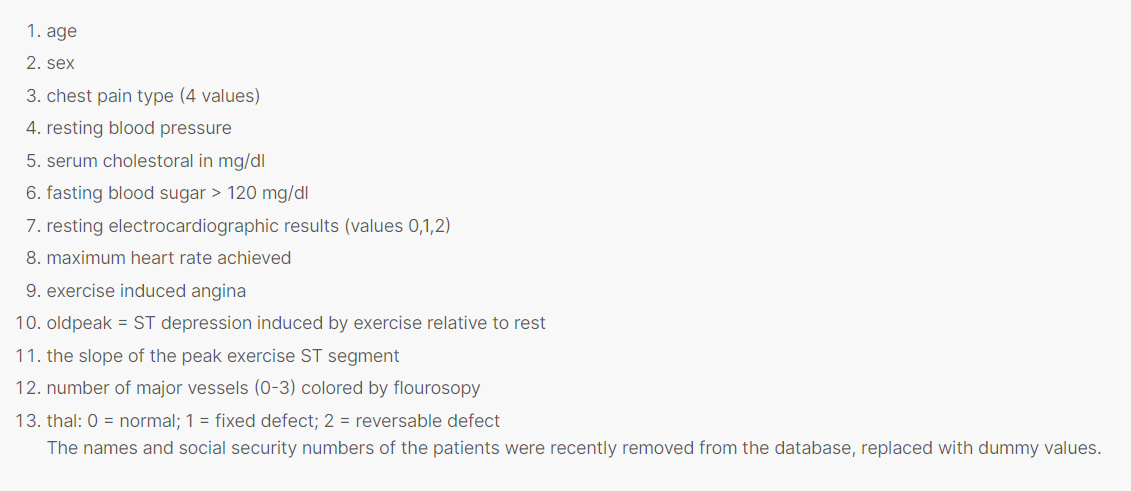
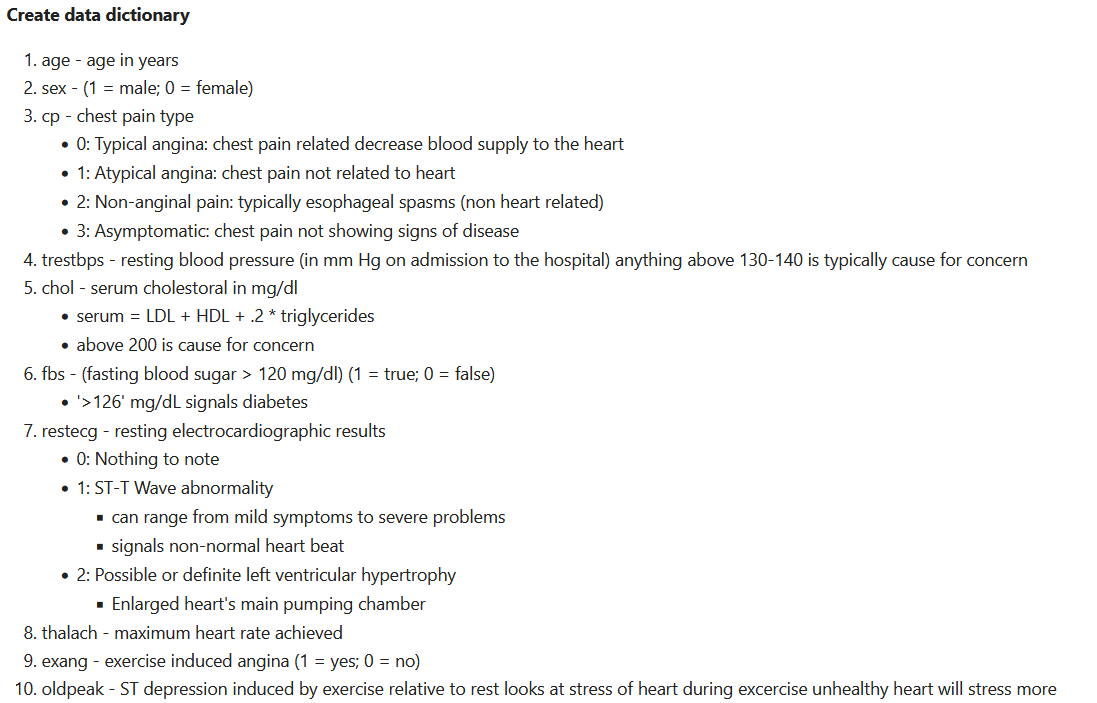
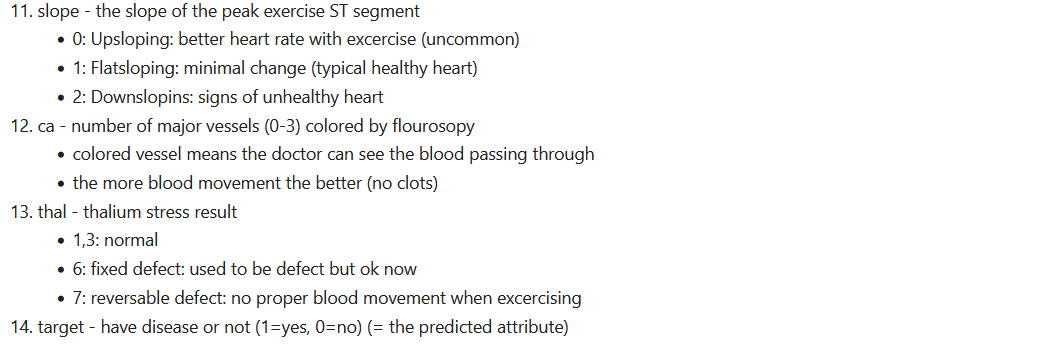

## 3. Evaluation
> If a 95% accuracy is attainable during proof of concept , the project shall be pursued

## 4. Features
* What features do we model?
* Are all features in the dataset really contributing to the target variable?

In [3]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

In [4]:
# Load data
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (EDA)
The goal here is to find more about the data and become a subject matter expert on the dataset we are working on

This is done to give possible reasons for our predictions, detect under/overfitting
1. What kind of question(s) are being solved?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and why should you care about them? (Maybe due to entry error or actual outlier)
5. How can you add, change or remove features to get more out of your data?

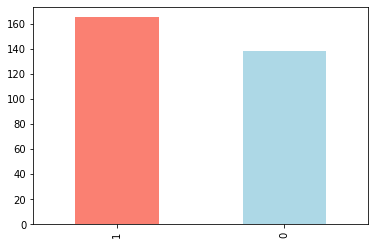

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [14]:
df.isna().sum()
df.describe()
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
# Compare target column with sex column (male = 1, female=0)
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
# roughly 75 out of a 100 women in our dataset have heart disease, emphasis on our dataset

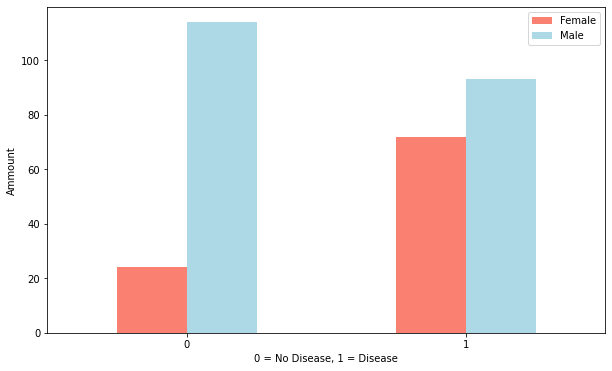

In [23]:
# Create a plot of crosstab 
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Ammount")
plt.legend({"Female", "Male"})
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

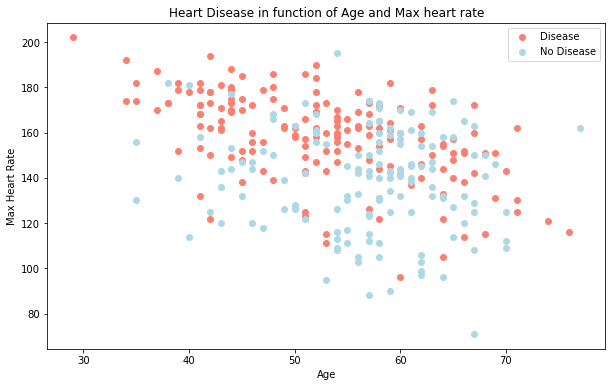

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon");
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="lightblue");
plt.title("Heart Disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

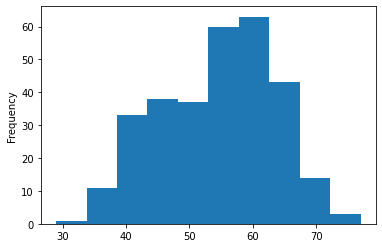

In [31]:
# Check distribution of age column with a histogram 
df.age.plot.hist();
# Best ways to judge outliers

### Heart Disease frequency per chest type 

In [32]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


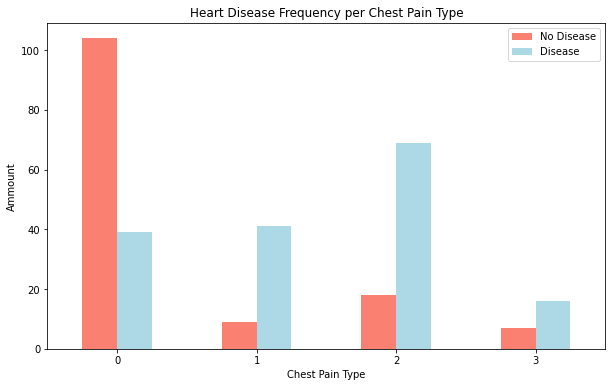

In [35]:
# Apparently non heart related pain have a high chance of having a heart disease (?) dosn't really make sense
# for a data scientist, one could search up for its possible reasons, reach out to someone etc.., this is a part of EDA
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Ammount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [36]:
# Create a co-relation matrix to check how the variables coreleate with each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


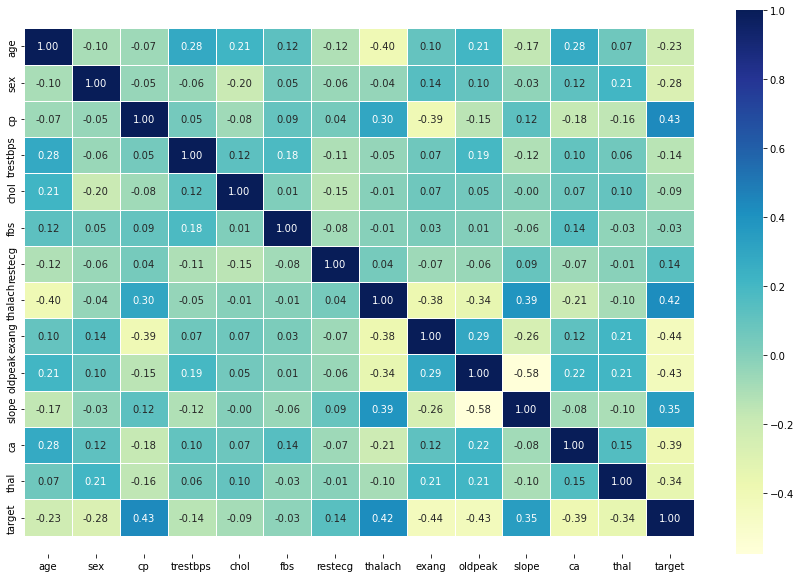

In [38]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [39]:
# Higher positive value => Higher positive corelation, Higher negative value => Higher negative corelation
# So as cp goes up, the target value also goes up